<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Проект 10. Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Описание данных**

- Признаки: пол, возраст, зарплата застрахованного, количество членов его семьи.

- Целевой признак: количество страховых выплат клиенту за последние 5 лет.

**Ход проекта**

Данные о клиентах страховой компании получены из файла `insurance.csv`.

Решение пройдёт в пять этапов:
1. Загрузка и обзор данных.
2. Влияние умножения матрицы признаков на обратимую матрицу.
3. Алгоритм преобразования данных для решения задачи.
4. Проверка алгоритма.
5. Общий вывод.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
from IPython.core.display import display, HTML

In [2]:
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
data = pd.read_csv('/datasets/insurance.csv')

Количество дубликатов: 153


Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0    1     41.0   49600.0            1                  0
1    0     46.0   38000.0            1                  1
2    0     29.0   21000.0            0                  0
3    0     21.0   41700.0            2                  0
4    1     28.0   26100.0            0                  0
5    1     43.0   41000.0            2                  1
6    1     39.0   39700.0            2                  0
7    1     25.0   38600.0            4                  0
8    1     36.0   49700.0            1                  0
9    1     32.0   51700.0            1                  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

Пол      Возраст      Зарплата  Члены семьи  Страховые выплаты
count  5000.000000  5000.000000   5000.000000  5000.000000        5000.000000
mean      0.499000    30.952800  39916.360000     1.194200           0.148000
std       0.500049     8.440807   9900.083569     1.091387           0.463183
min       0.000000    18.000000   5300.000000     0.000000           0.000000
25%       0.000000    24.000000  33300.000000     0.000000           0.000000
50%       0.000000    30.000000  40200.000000     1.000000           0.000000
75%       1.000000    37.000000  46600.000000     2.000000           0.000000
max       1.000000    65.000000  79000.000000     6.000000           5.000000

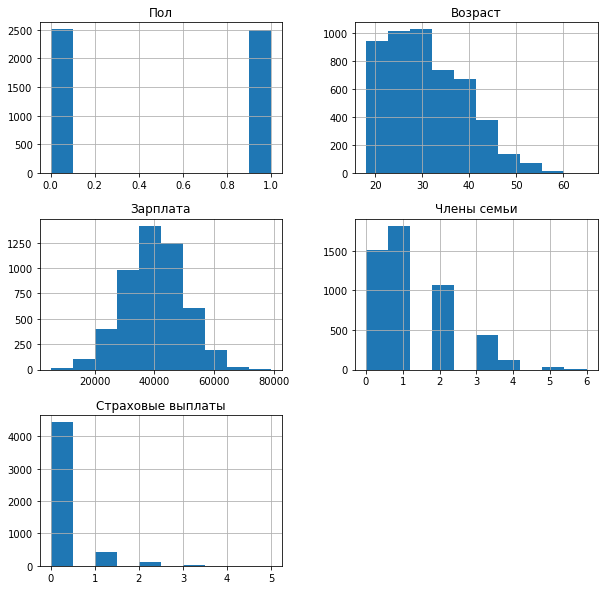

In [4]:
# функция вызывающая все методы для обзора данных
def data_review(data):
    print('Количество дубликатов:', data.duplicated().sum())
    display(data.head(10))
    display(data.info())
    display(data.describe())
    data.hist(figsize=(10, 10));
    
# вызовем функцию, чтобы вывести информацию о датафрейме
data_review(data)

Приведём столбцы `Возраст` и `Зарплата` к целочисленному типу данных, поскольку фактически они хранят целые значения. 

In [5]:
data['Возраст'] = data['Возраст'].astype(int)
data['Зарплата'] = data['Зарплата'].astype(int)
data.dtypes

Пол                  int64
Возраст              int64
Зарплата             int64
Члены семьи          int64
Страховые выплаты    int64
dtype: object

В данных обаружено 153 дубликата. Посмотрим, что это за строки.

In [6]:
duplicates = data[data.duplicated()]
duplicates.head(5)

Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
281    1       39     48100            1                  0
488    1       24     32900            1                  0
513    0       31     37400            2                  0
718    1       22     32600            1                  0
785    0       20     35800            0                  0

In [7]:
len(duplicates[duplicates['Страховые выплаты'] == 0])

152

Практически все дубликаты пренадлежат к классу объектов с 0 кол-вом страховых выплат. Так как данный класс самый крупный, то удаление такого небольшого кол-ва строк не отразиться на балансе классов. Исключим дубликаты из выборки.

In [8]:
data = data.drop_duplicates()
len(data)

4847

**Вывод**

В каждой строке таблицы — данные о клиентах страховой компании. Исходные данные уже были неплохого качества (нет пропусков, выбросов, аномалий, распределны нормально, неявных дубликатов быть не может, т.к. данные исключительно численные), однако нуждались в некоторой предобработке. Мы подготовили данные, и теперь можно приступать к разработке метода защиты данных клиентов.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Прверим алгебраически, изменится ли качество предсказаний модели при умножении матрицы признаков на обратимую матрицу.

Некую обратимую матрицу, на которую умножаются признаки, мы обозначили за $P$. Новый вектор весов, который получится на основе преобразованной матрицы признаков обозначим за $w'$. Тогда новый вектор предсказаний обозначим за $a'$. Нам необходимо выяснить, измениться ли вектор предсказаний после перемножения матриц или нет, иными словами $a'=a$ или $a'\neq a$.

Предсказания для преобразованной матрицы:

$$
a' = XPw'
$$

Формула обучения для преобразованной матрицы:

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$

Раскроем скобки по свойству транспонированных матриц:

$$
w' = (P^T X^T XP)^{-1} P^T X^T y
$$

Поскольку матрицы $P^T$ и $X^T XP$ квадратные, то мы можем раскрыть скобки по свойству обратных матриц. В результате несколько множителей сократятся:

$$
w' = (X^T XP)^{-1} (P^T)^{-1} P^T X^T y = (X^T XP)^{-1}X^T
$$

Поскольку матрицы $X^TX$ и $P$ квадратные, то мы можем раскрыть скобки по свойству обратных матриц:


$$
w' = P^{-1}(X^T X)^{-1}X^T
$$

Можно увидеть, что результат перемножения $(X^T X)^{-1}X^T$ - это на самом деле вектор $w$. Отсюда получаем следующую формулу: 

$$
w' = P^{-1}w
$$

Подставим данное произведение в формулу предсказаний и получим следующее:

$$
a' = XPw' = XPP^{-1}w = Xw
$$

В результате мы получаем, что значения $a'$ и $a$ равны, значит, $a'=a$.

**Ответ:** 

Качество линейной регрессии не изменится, если мы домножим матрицу признаков на обратимую мтарицу.

**Обоснование:** 

Мы алгебраически доказали, что значения вектора предсказаний не изменятся, если мы домножим матрицу на обратимую матрицу.

**Вывод**

В данном разделе мы доказали математически, что вектор предсказаний линейной регресси не изменился после умножения матрицы признаков на обратимую матрицу. Следовательно, и качество линейной регрессии не изменилось. Вектор весов, после умножения на обратимую матрицу, меняется, поэтому для преобразованный матрицы признаков модель нужно обучать заново.

## Алгоритм преобразования

**Алгоритм**

1. Разделим исходные данные на обучающую и тестовую выборку.
2. Сгенерируем обратимую матрицу. Чтобы гарантировать обратимость, мы рекурсивно вызываем метод генерации матрицы и  проверяем её на обратимость. Функция не закончит своё выполнение, пока не будет создана обратимая матрица. Кроме того, матрица должна быть квадратной (одно из условий обратимости) и согласованной по размеру с исходной матрицей. Ширина исходной матрицы равна 4, следовательно создаваемая матрица должна быть размера 4х4. Можно еще подумать о том, что по размеру преобразованная матрица должна быть такой же, как и изначальная матрица признаков, но это уже гарантируется из предыдущих условий.
3. Умножим матрицу признаков на обратимую матрицу, получим зашифрованную матрицу признаков.
4. Обучим две модели линейной регрессии: на исходной матрице признаков и на преобразованной матрице признаков.
5. Получим результаты работы моделей на тестовых данных.
6. Сравним предсказания двух моделей с помощью метрики качества *R2*.

**Обоснование**

Ранее мы доказали математически, что в теории предсказания линейной регресси, обученной за закодированных данных, не ухудшатся. Следуя данному алгоритму, мы сможем на практике в этом убедиться. Если модели, обученные на исходной и преобразованной матрице признаков, выдадут достаточно близкие значения метрики *R2*, то это покажет, что качество линейной регрессии действительно не изменилось.

## Проверка алгоритма

Разделим данные на выборки.

In [9]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=.25, random_state=12345)

print(features_train.shape[0])
print(features_test.shape[0])

3635
1212


Создадим обратимую матрицу $P$. Воспользуемся рекурсией, которую завершим лишь тогда, когда сгенерированная матрица будет обратимой.

In [12]:
MATRIX_SIZE = 4

def func(dim):
    transform_matrix = np.random.rand(dim, dim)
    try: 
        inv = np.linalg.inv(transform_matrix)
        return transform_matrix, inv
    except:
        func(dim) 
        
p_matrix, inv_matrix = func(MATRIX_SIZE)
print('Обратимая матрица: ')
display(p_matrix)
print('Обратная матрица: ')
display(inv_matrix)

Обратимая матрица: 


array([[0.78968434, 0.33762709, 0.98799206, 0.78012894],
       [0.00948368, 0.5020033 , 0.18430085, 0.40334129],
       [0.77789445, 0.92162235, 0.07255782, 0.48897507],
       [0.95430825, 0.12324095, 0.5392654 , 0.92489792]])

Обратная матрица: 


array([[ 0.18892355, -1.84984684,  0.91662947,  0.16274868],
       [ 0.36663444,  0.52067533,  0.79504365, -0.9566337 ],
       [ 1.72040468, -0.28113425, -0.32225042, -1.1581516 ],
       [-1.24687318,  2.00320655, -0.8638256 ,  1.71601114]])

Обратная матрица $P^{-1}$ для матрицы $P$ существует. Мы вывели её в ячейке выше.

Умножим признаки $X$ на обратимую матрицу $P$. Посмотрим, как изменились данные после преобразования.

In [13]:
display(features_train.head(5))
display(features_test.head(5))

Пол  Возраст  Зарплата  Члены семьи
4599    0       28     54500            2
3882    1       38     50700            1
4705    0       24     28000            1
1400    0       47     38800            0
728     0       40     32500            1

Пол  Возраст  Зарплата  Члены семьи
1335    1       23     47200            0
3875    1       32     65900            0
166     1       33     33900            2
3003    0       39     19300            2
424     0       46     27500            2

In [14]:
coded_features_train = features_train @ p_matrix
coded_features_test = features_test @ p_matrix
display(coded_features_train.head(5))
display(coded_features_test.head(5))

0             1            2             3
4599  42397.421856  50242.720874  3960.640397  26662.284797
3882  39441.353147  46745.790348  3687.212399  24808.068166
4705  21782.226604  25817.597236  2036.581576  13701.907116
1400  30182.750515  35782.541495  2823.905736  18991.189849
728   25282.903383  29972.929882  2366.040600  15908.748402

0             1            2             3
1335  36717.625997  43512.458818  3429.956234  23089.680395
3875  51264.337624  60751.314870  4788.446263  32237.144321
166   26373.633224  31260.148023  2467.858706  16592.195141
3003  15015.641426  17807.136045  1408.632279   9454.799003
424   21394.442327  25367.953372  2004.896547  13467.217986

Проверим, что мы можем однозначно декодировать данные с помощью обратной матрицы.

In [15]:
display(np.round(coded_features_train @ np.linalg.inv(p_matrix)).head(5))
display(np.round(coded_features_test @ np.linalg.inv(p_matrix)).head(5))

0     1        2    3
4599  0.0  28.0  54500.0  2.0
3882  1.0  38.0  50700.0  1.0
4705  0.0  24.0  28000.0  1.0
1400  0.0  47.0  38800.0  0.0
728  -0.0  40.0  32500.0  1.0

0     1        2    3
1335  1.0  23.0  47200.0 -0.0
3875  1.0  32.0  65900.0  0.0
166   1.0  33.0  33900.0  2.0
3003  0.0  39.0  19300.0  2.0
424   0.0  46.0  27500.0  2.0

В результате умножения преобразованных признаков на обратную матрицу $P^{-1}$ мы получили исходные данные. Все предварительные шаги выполнены корректно.

Обучим модель линейной регрессии на исходных данных.

In [16]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
r2_initial_data = r2_score(target_test, predictions)
print('R2 на исходных данных:', r2_initial_data)

R2 на исходных данных: 0.42307727615837565


Обучим модель линейной регресси на преобразованных данных.

In [17]:
model = LinearRegression()
model.fit(coded_features_train, target_train)
predictions_coded = model.predict(coded_features_test)
r2_coded_data = r2_score(target_test, predictions_coded)
print('R2 на преобразованных данных:', r2_coded_data)

R2 на преобразованных данных: 0.42307727615716817


In [18]:
np.abs(r2_coded_data - r2_initial_data)

1.2074785615823203e-12

Как мы можем видеть абсолютная разница между метриками *R2* модели на исходных данных и модели на проеобразованных данных крайне низка. Разница между результирующими метриками достигается лишь на 12-ом знаке после запятой, значения метрик практически равны.

**Вывод**

В данном разделе мы на практике убедились в том, что качество линейной регресси после преобразования признаков не изменилось. Метрика *R2* на данных до кодирования практически не отличается от метрики *R2*, которую мы получили после кодирования.

## Общий вывод

В ходе проекта мы предложили алгоритм для защиты клиентских данных. При этом качество модели на преобразованных данных не ухудшилось.

Исследуя данные, мы:
1. Выполнили обзор и подготовили датафрейм для анализа.
2. Математически обосновали использование обратимой матрицы в качестве интсрумента для шифрования данных.
3. Сформулировали алгоритм пребразования данных.
4. Реализовали алгоритм шифрования данных и обучили две модели линейной регресии.
5. Проанализировали значения метрики *R2* для модели, обученной на исходных и на преобразованных данных. Установили, что метрика практически не изменилась, а следвотельно, качество линейной регрессии не ухудшилось после преобразования матрицы признаков.